# KNN算法

## 想法及原理

对于一个样本，希望通过与之比较相近的样本来进行预测。想要了解一个人，可以先去了解他的朋友们。那么从机器学习角度出发，通过协变量X来定义距离。然后选取一个K，表示使用离样本最近的K个样本来进行预测。

### 常见的距离：
1. 欧式距离：$D(x,y) = \sqrt{\sum_i^{d}(x_i - y_i)^2}$
2. 曼哈顿距离: $D(x,y) = \sum_i^d |x_i-y_i|$
3. 切比雪夫距离: $D(x,y) = \lim_{k \rightarrow+ \infty}[\sum_i^d(x_i - y_i)^k]^{1/k} $
4. 闵可夫斯基距离： $D(x,y) = \sqrt[p]{\sum_{i=1}^{d}\left|x_{i}-y_{i}\right|^{p}}$ 其实是一组距离，p=1,2,$+\infty$分别对应欧式距离，曼哈顿距离和切比雪夫距离
5. 标准化欧式距离
6. 马氏距离
7. 巴氏距离
8. 汉明距离
9. 夹角余弦
10. 杰拉德相似系数 
11. 皮尔逊系数

### 近邻个数K的选取

K的大小代表了模型的复杂程度，K=1表示每次只用周围一个点的标签来预测，N个点需要计算N次，模型复杂度高。K=N表示使用周围N个点来进行预测，对于训练集内的所有点来说，预测结果都是整个训练集上标签值的众数，模型复杂度最低。实际中一般根据K折交叉验证的结果来选取K。

## 实现步骤

对于每一个样本，需要从所有N个样本中找到、距离其最近的K个点。使用出现最多的标签来进行预测。如果使用数组，算法复杂度为O(N*K)。


## 算法的优缺点

优点：
1. 简单易懂

缺点：
1. 算法是惰性计算，也就是只储存数据，需要进行预测的时候才会执行计算。
2. 算法复杂度很高，即使使用KD树也只能把复杂度降低到O(logK *N)

## 需要注意的问题

1. 特征标准化：如果不进行特征标准化，那么方差较大的维度会主导距离的大小
2. 算法复杂度非常高，采用数组的数据结构，使用N个数据的训练集，K近邻预测M个点的算法复杂度为O(M*N*K)
3. 可以设置样本呢重要性：距离待预测样本越近的样本拥有更大的权重，可以线性权重也可以二次权重等等


## Sklearn - Nearest Neighbors

[sklearn.neighbors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors)提供了相关的函数支持，可以进行有监督学习也可以进行无监督学习。函数可以接受`ndarray`和`scipy.sparse`的输入。涉及到的数据结构有`Ball Tree`和`KD Tree`。

### 无监督计算最近邻
[NearestNeighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) 提供了三种算法去计算最近邻的样本，`['auto', 'ball_tree', 'kd_tree', 'brute']`。其中`'brute'`是基于[sklearn.metrics.pairwise](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise)去计算的。

In [7]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
print(indices)
print(distances)

[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]
[[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]]


In [10]:
import numpy as np
from sklearn.neighbors import KDTree
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X, k=2, return_distance=False)

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

### 有监督最近邻分类


Automatically created module for IPython interactive environment


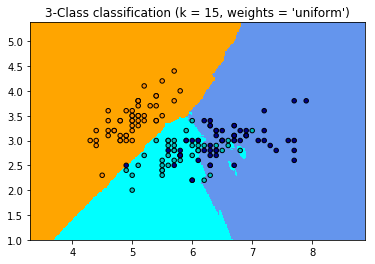

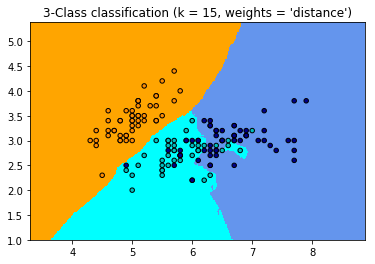

In [13]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

### 有监督最近邻回归

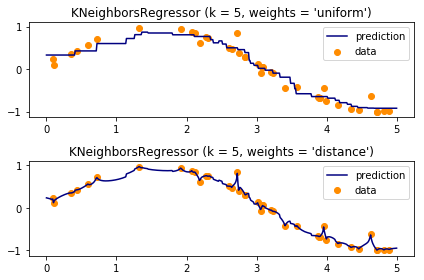

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

In [48]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data_all = fetch_olivetti_faces()
data = data_all['data']
targets = data_all['target']

Automatically created module for IPython interactive environment


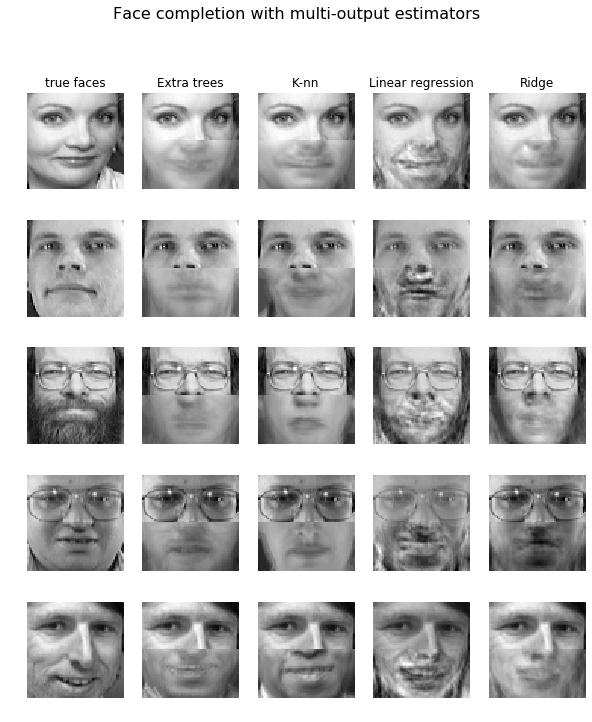

In [49]:
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()

### 最近邻算法比较

#### 暴力搜索

复杂度为$O(DN^2)$，$D$是协变量维度，$N$是样本数量。

#### KD树
复杂度为$O(DN\log{N}))$，当数据维度比较高的时候KD树也不再适合计算，当类别$D$增大的时候，KD树的复杂度近似为$O(DN^2)$

#### Ball Tree
算法复杂度和KD树一样。

#### Sklearn中是如何选择算法的？
The optimal algorithm for a given dataset is a complicated choice, and depends on a number of factors:

number of samples  (i.e. n_samples) and dimensionality  (i.e. n_features).

Brute force query time grows as 

Ball tree query time grows as approximately 

KD tree query time changes with  in a way that is difficult to precisely characterise. For small  (less than 20 or so) the cost is approximately , and the KD tree query can be very efficient. For larger , the cost increases to nearly , and the overhead due to the tree structure can lead to queries which are slower than brute force.

For small data sets ( less than 30 or so),  is comparable to , and brute force algorithms can be more efficient than a tree-based approach. Both KDTree and BallTree address this through providing a leaf size parameter: this controls the number of samples at which a query switches to brute-force. This allows both algorithms to approach the efficiency of a brute-force computation for small .

data structure: intrinsic dimensionality of the data and/or sparsity of the data. Intrinsic dimensionality refers to the dimension  of a manifold on which the data lies, which can be linearly or non-linearly embedded in the parameter space. Sparsity refers to the degree to which the data fills the parameter space (this is to be distinguished from the concept as used in “sparse” matrices. The data matrix may have no zero entries, but the structure can still be “sparse” in this sense).

Brute force query time is unchanged by data structure.

Ball tree and KD tree query times can be greatly influenced by data structure. In general, sparser data with a smaller intrinsic dimensionality leads to faster query times. Because the KD tree internal representation is aligned with the parameter axes, it will not generally show as much improvement as ball tree for arbitrarily structured data.

Datasets used in machine learning tend to be very structured, and are very well-suited for tree-based queries.

number of neighbors  requested for a query point.

Brute force query time is largely unaffected by the value of 

Ball tree and KD tree query time will become slower as  increases. This is due to two effects: first, a larger  leads to the necessity to search a larger portion of the parameter space. Second, using  requires internal queueing of results as the tree is traversed.

As  becomes large compared to , the ability to prune branches in a tree-based query is reduced. In this situation, Brute force queries can be more efficient.

number of query points. Both the ball tree and the KD Tree require a construction phase. The cost of this construction becomes negligible when amortized over many queries. If only a small number of queries will be performed, however, the construction can make up a significant fraction of the total cost. If very few query points will be required, brute force is better than a tree-based method.

Currently, algorithm = 'auto' selects 'brute' if , the input data is sparse, or effective_metric_ isn’t in the VALID_METRICS list for either 'kd_tree' or 'ball_tree'. Otherwise, it selects the first out of 'kd_tree' and 'ball_tree' that has effective_metric_ in its VALID_METRICS list. This choice is based on the assumption that the number of query points is at least the same order as the number of training points, and that leaf_size is close to its default value of 30.

### Nearest Centroid Classifier

### Nearest Neighbors Transformer

### Neighborhood Components Analysis

## 手写KNN(To do, this is japsonzbz's code)

In [52]:
import numpy as np
from math import sqrt
from collections import Counter

class kNNClassifier:

    def __init__(self, k):
        """初始化分类器"""
        assert k >= 1, "k must be valid"
        self.k = k
        self._X_train = None
        self._y_train = None

    def fit(self, X_train, y_train):
        """根据训练数据集X_train和y_train训练kNN分类器"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert self.k <= X_train.shape[0], \
            "the size of X_train must be at least k"
        self._X_train = X_train
        self._y_train = y_train
        return self

    def predict(self,X_predict):
        """给定待预测数据集X_predict，返回表示X_predict结果的向量"""
        assert self._X_train is not None and self._y_train is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == self._X_train.shape[1], \
            "the feature number of X_predict must be equal to X_train"
        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)

    def _predict(self, x):
        distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in self._X_train]
        nearest = np.argsort(distances)
        topK_y = [self._y_train[i] for i in nearest]
        votes = Counter(topK_y)
        return votes.most_common(1)[0][0]

    def __repr__(self):
        return "kNN(k=%d)" % self.k

## 总结

1. 与其看公众号和CSDN，不如去找一本教科书或者Sklearn的官方文档去进行研究。教科书可以明确各种公式还有性质，记号也相对统一。官方文档的学习可以明确代码规范以及文档注释，为以后发起pull request做铺垫
2. 因为毕业论文等原因，本次学习比较仓促，只花费半天时间。每周需要预留至少2天。
3. 对于from scratch的代码，不知道应该从何入手，多看源码或者其他开发者写的代码？

## 参考文献
1. [机器学习的敲门砖：初探kNN算法](https://mp.weixin.qq.com/s?__biz=MzI4MjkzNTUxMw==&mid=2247483857&idx=1&sn=c888f2c4d40fb64eec5f5e78a3467b1a&chksm=eb932867dce4a171e5e9dba9f46a4e46127f063d1f9e817d250c5a5c18c1dd55f2acfa3c2662&token=2129819246&lang=zh_CN#rd)
2. [Sklearn - Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html#unsupervised-nearest-neighbors)
3. [机器学习中的距离和相似度度量](https://zhuanlan.zhihu.com/p/80223624)